<a href="https://colab.research.google.com/github/rushi2012/Stock_Price_Prediction/blob/main/Stock_Price_Prediction_LSTM_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
#import File
df = pd.read_csv('/content/AAPL_Price_History_20211207.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Unnamed: 6
0,12/7/2011,13.9261,13.9621,13.8129,13.8961,305000048.0,NaN
1,12/8/2011,13.9803,14.1250,13.9368,13.9521,376356580.0,NaN
2,12/9/2011,14.0303,14.0728,13.9653,14.0578,297143408.0,NaN
3,12/12/2011,13.9886,14.0678,13.9089,13.9943,301065820.0,NaN
4,12/13/2011,14.0357,14.1214,13.8250,13.8861,339137092.0,NaN


In [3]:
df.shape

(2520, 7)

In [4]:
df=df.iloc[:,:-1]

In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume
2515,12/6/2021,164.29,167.8799,164.28,165.32,107496982.0
2516,12/7/2021,169.08,171.5800,168.34,171.18,120405352.0
2517,NaN,NaN,NaN,NaN,NaN,NaN
2518,NaN,NaN,NaN,NaN,NaN,NaN
2519,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna()

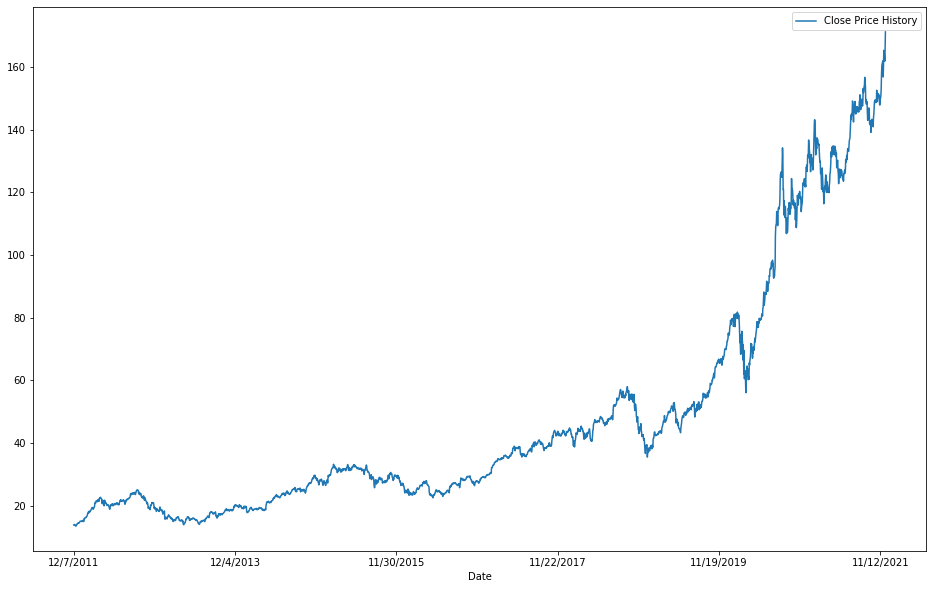

In [7]:
# Analize Closing Prize
df.plot(x = 'Date', y = 'Close', figsize = (16,10), label='Close Price History')


In [8]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values
train_data=final_dataset[0:1901,:]
valid_data=final_dataset[1901:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [10]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(64))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=25,batch_size=1,verbose=2)


Epoch 1/25
1841/1841 - 52s - loss: 3.9112e-04 - 52s/epoch - 28ms/step
Epoch 2/25
1841/1841 - 49s - loss: 8.5606e-05 - 49s/epoch - 26ms/step
Epoch 3/25
1841/1841 - 48s - loss: 7.0028e-05 - 48s/epoch - 26ms/step
Epoch 4/25
1841/1841 - 47s - loss: 3.6974e-05 - 47s/epoch - 25ms/step
Epoch 5/25
1841/1841 - 47s - loss: 3.6665e-05 - 47s/epoch - 26ms/step
Epoch 6/25
1841/1841 - 47s - loss: 3.0716e-05 - 47s/epoch - 26ms/step
Epoch 7/25
1841/1841 - 46s - loss: 2.9169e-05 - 46s/epoch - 25ms/step
Epoch 8/25
1841/1841 - 47s - loss: 2.7396e-05 - 47s/epoch - 26ms/step
Epoch 9/25
1841/1841 - 49s - loss: 2.3582e-05 - 49s/epoch - 26ms/step
Epoch 10/25
1841/1841 - 49s - loss: 2.2048e-05 - 49s/epoch - 26ms/step
Epoch 11/25
1841/1841 - 49s - loss: 2.3298e-05 - 49s/epoch - 26ms/step
Epoch 12/25
1841/1841 - 48s - loss: 2.2363e-05 - 48s/epoch - 26ms/step
Epoch 13/25
1841/1841 - 49s - loss: 2.1993e-05 - 49s/epoch - 27ms/step
Epoch 14/25
1841/1841 - 50s - loss: 2.3459e-05 - 50s/epoch - 27ms/step
Epoch 15/25
184

In [11]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)


In [12]:
lstm_model.save("saved_model.h5")

In [13]:
predicted_closing_price=predicted_closing_price.reshape(39424,1)

In [14]:
predicted_closing_price=pd.DataFrame(predicted_closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


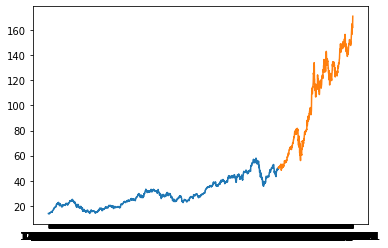

In [15]:
train_data=new_dataset[:1901]
valid_data=new_dataset[1901:]
#len(predicted_closing_price)
#predicted_closing_price.iloc[:,0]
#plt.plot(train_data["Close"])

valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])